Nama : Dimas Tri Atmojo

Nim : 5312422033

Prodi : Teknik Komputer

In [1]:
# install modul scikit-dsp-comm
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 1.5 MB/s eta 0:00:00


In [2]:
# Memuat modul-modul yang diperlukan dan menampilkan plot secara langsung di notebook
%pylab inline

# Mengimpor modul-modul yang diperlukan dari sk_dsp_comm package
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh

# Mengimpor modul scipy.signal sebagai signal
import scipy.signal as signal

# Mengimpor fungsi Audio dan display dari IPython.display
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


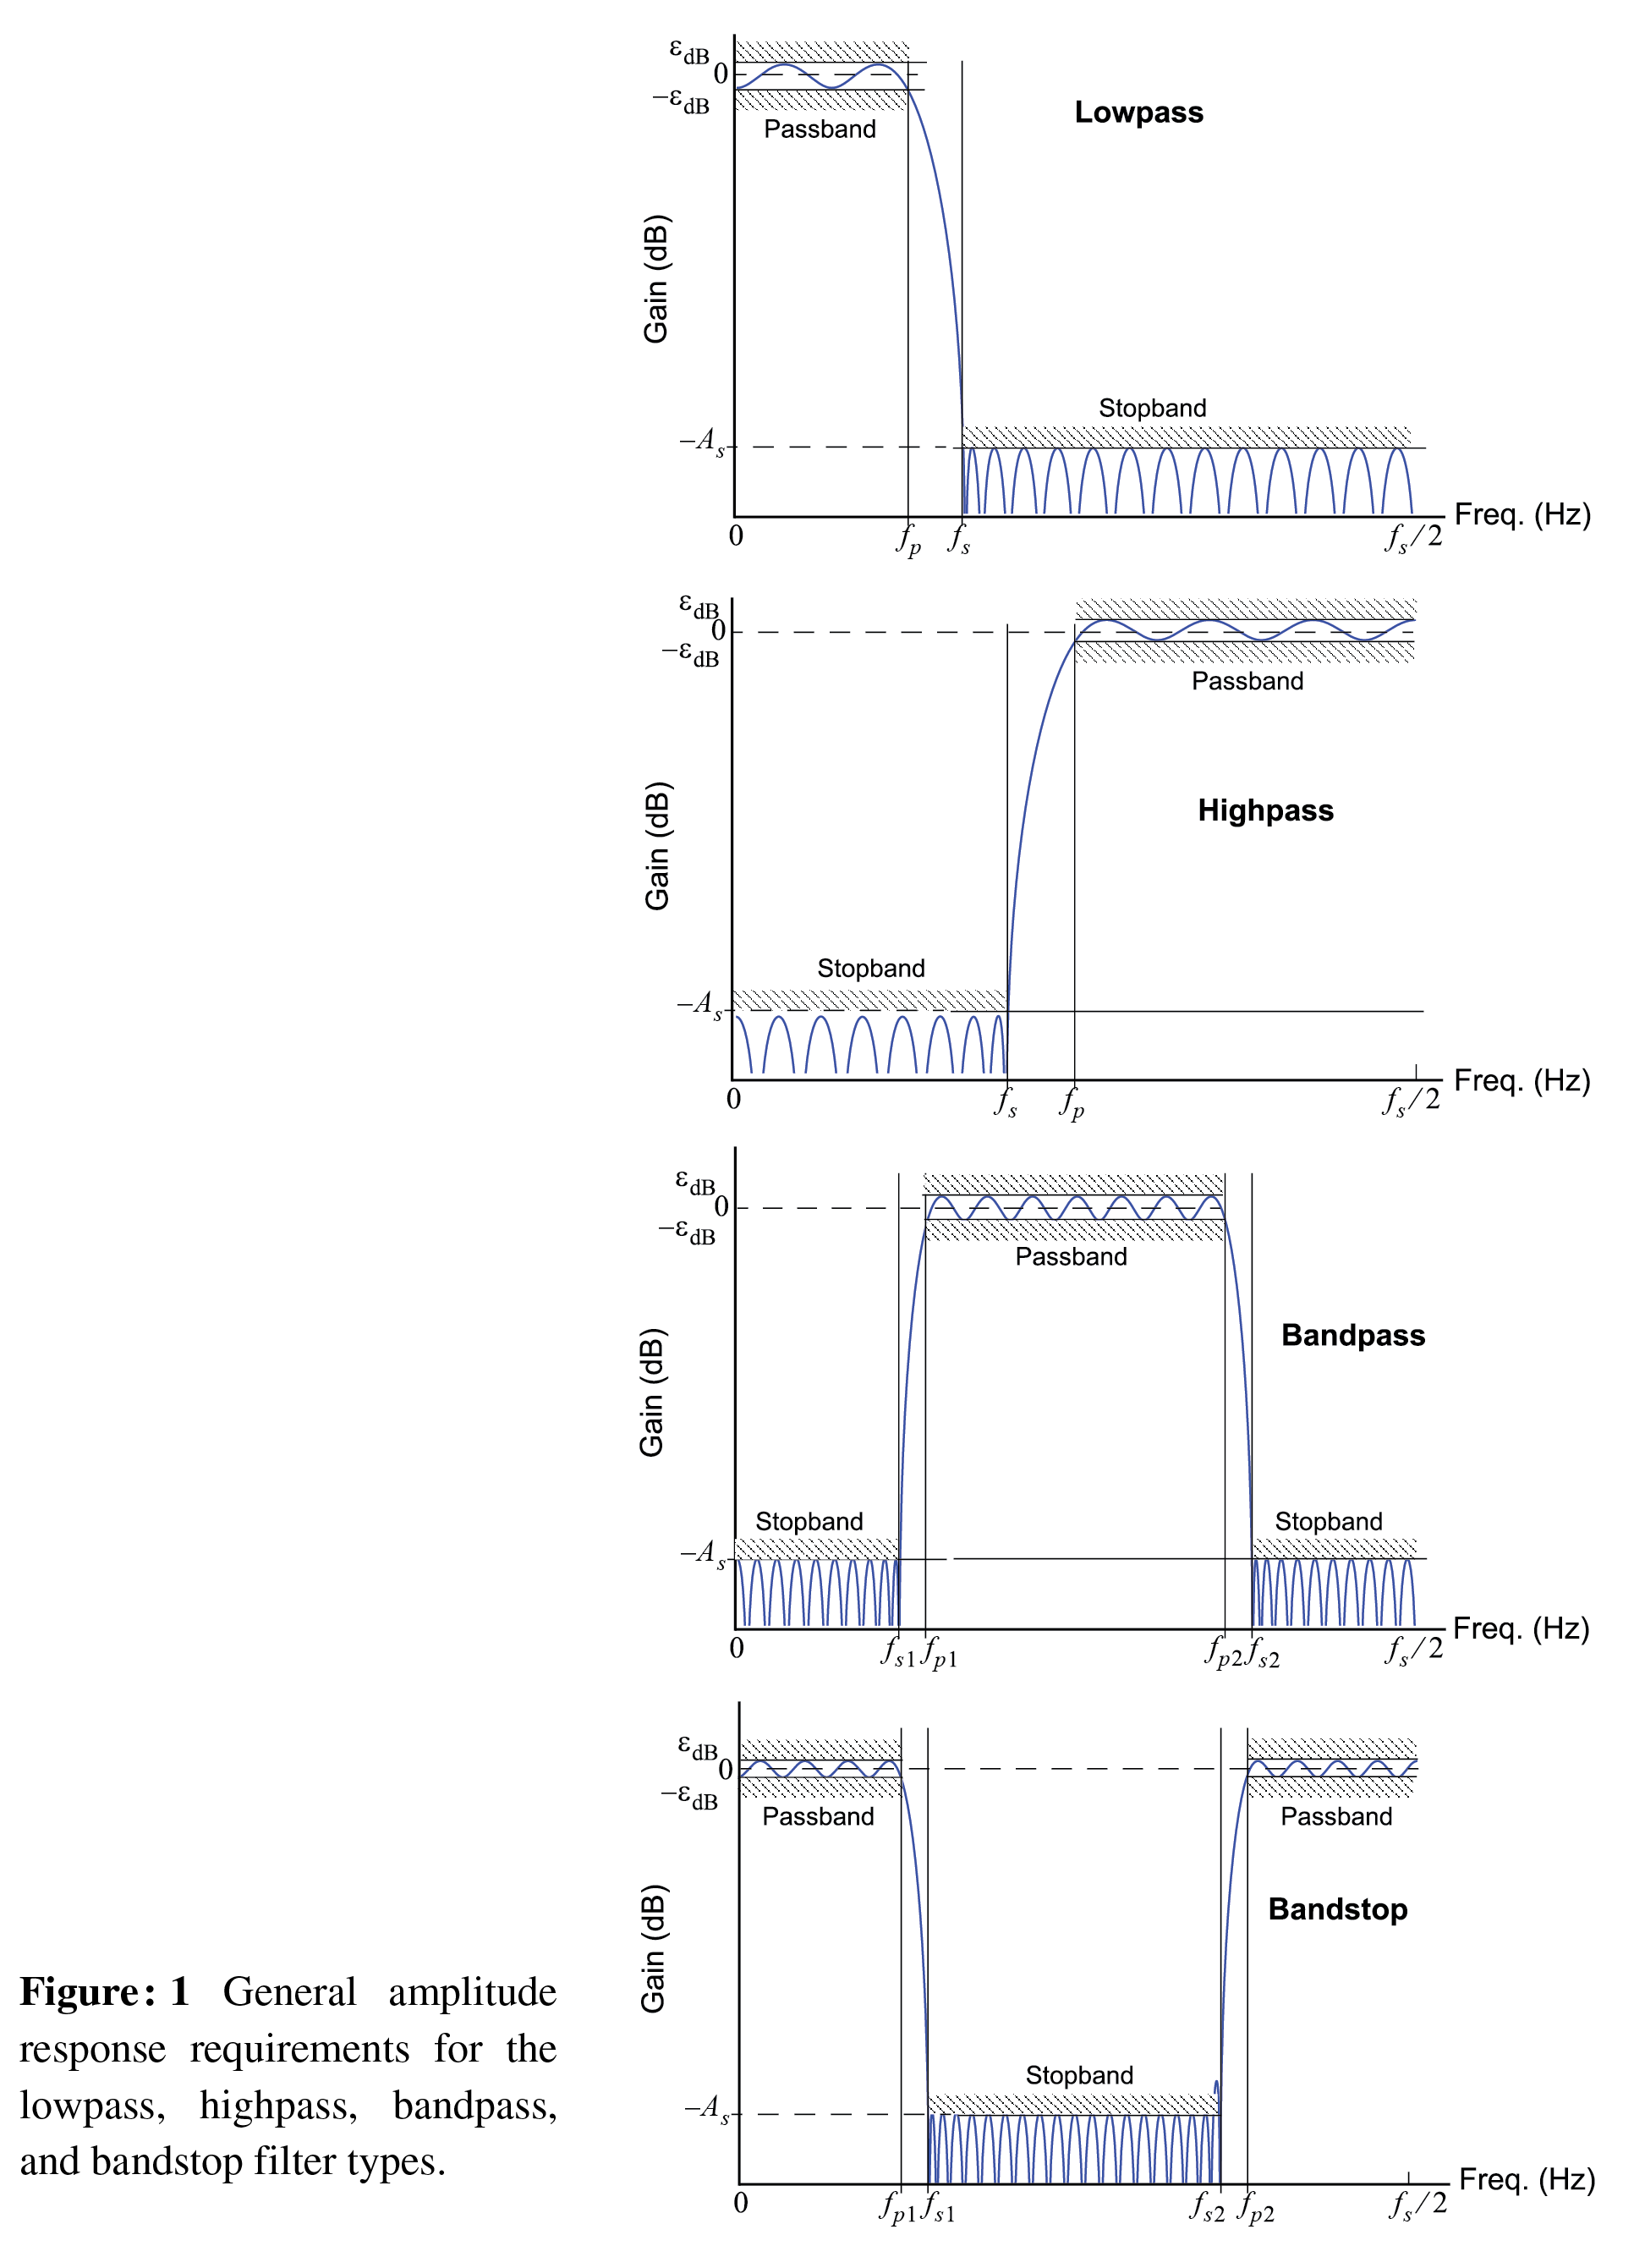

Gambar di atas menunjukkan respons amplitudo umum yang diharapkan untuk empat jenis filter: lowpass, highpass, bandpass, dan bandstop. Setiap grafik menggambarkan bagaimana gain (penguatan) dalam dB berubah terhadap frekuensi (Hz).

1. **Lowpass Filter**: Grafik pertama menunjukkan filter lowpass yang memungkinkan frekuensi rendah melewati dengan sedikit atenuasi di passband, yang berada di antara 0 hingga \( f_p \) (frekuensi batas passband). Di luar \( f_s \) (frekuensi batas stopband), gain turun secara signifikan, mengurangi amplitudo sinyal frekuensi tinggi. Idealnya, atenuasi pada stopband adalah \( -A_s \) dB, sementara dalam passband, variasi gain diizinkan hingga \( \pm \epsilon_{dB} \).

2. **Highpass Filter**: Grafik kedua menunjukkan filter highpass yang memungkinkan frekuensi tinggi melewati dengan sedikit atenuasi di passband, yang dimulai dari \( f_p \) hingga seterusnya. Di bawah \( f_s \), gain turun drastis, mengurangi amplitudo sinyal frekuensi rendah. Passband memiliki variasi gain \( \pm \epsilon_{dB} \), dan stopband memiliki atenuasi minimal \( -A_s \) dB.

3. **Bandpass Filter**: Grafik ketiga menggambarkan filter bandpass yang memungkinkan rentang frekuensi tertentu antara \( f_{p1} \) dan \( f_{p2} \) untuk melewati dengan sedikit atenuasi. Di luar rentang ini, gain berkurang drastis di kedua stopband yang terletak di bawah \( f_{s1} \) dan di atas \( f_{s2} \). Passband memiliki variasi gain \( \pm \epsilon_{dB} \) dan stopband memiliki atenuasi minimal \( -A_s \) dB.

4. **Bandstop Filter**: Grafik keempat menunjukkan filter bandstop yang menghalangi rentang frekuensi tertentu antara \( f_{s1} \) dan \( f_{s2} \), sehingga mengurangi gain secara signifikan dalam rentang tersebut. Frekuensi di luar rentang ini (passband) dibiarkan lewat dengan sedikit atenuasi, memiliki variasi gain \( \pm \epsilon_{dB} \), sedangkan stopband memiliki atenuasi minimal \( -A_s \) dB.

Setiap grafik menyoroti karakteristik utama dari berbagai filter dan menunjukkan bagaimana mereka digunakan untuk mengontrol amplitudo sinyal pada berbagai frekuensi, dengan parameter penting seperti \( f_p \), \( f_s \), \( \epsilon_{dB} \), dan \( A_s \) mengatur batasan dan efisiensi filter tersebut.

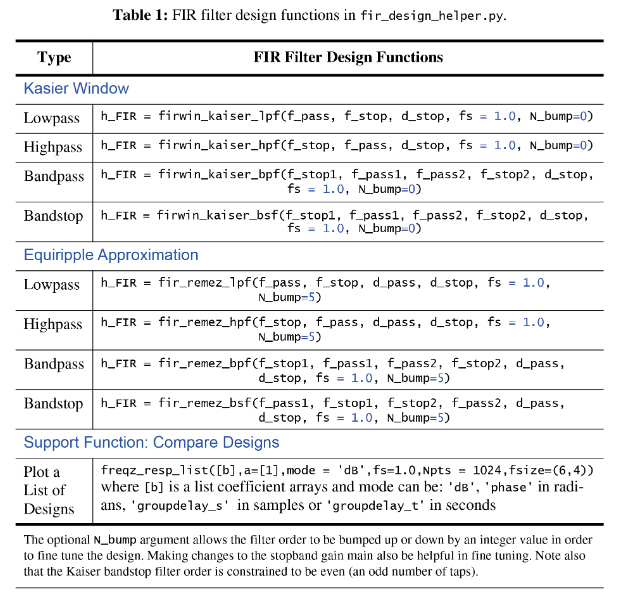

Gambar di atas adalah tabel yang berjudul "Table 1: FIR filter design functions in fir_design_helper.py" dan memberikan rincian fungsi-fungsi desain filter FIR (Finite Impulse Response) yang dapat digunakan untuk mendesain berbagai jenis filter menggunakan metode Jendela Kaiser dan Pendekatan Equiripple. Tabel ini juga mencakup fungsi pendukung untuk membandingkan desain filter yang berbeda.

1. **Kaiser Window**: Bagian ini menyajikan fungsi-fungsi untuk mendesain filter menggunakan metode Jendela Kaiser. Fungsi-fungsi ini adalah:
   - **Lowpass**: `h_FIR = firwin_kaiser_lpf(f_pass, f_stop, d_stop, fs=1.0, N_bump=0)`
   - **Highpass**: `h_FIR = firwin_kaiser_hpf(f_stop, f_pass, d_stop, fs=1.0, N_bump=0)`
   - **Bandpass**: `h_FIR = firwin_kaiser_bpf(f_stop1, f_pass1, f_pass2, f_stop2, d_stop, fs=1.0, N_bump=0)`
   - **Bandstop**: `h_FIR = firwin_kaiser_bsf(f_stop1, f_pass1, f_pass2, f_stop2, d_stop, fs=1.0, N_bump=0)`

2. **Equiripple Approximation**: Bagian ini menyajikan fungsi-fungsi untuk mendesain filter menggunakan pendekatan equiripple. Fungsi-fungsi ini adalah:
   - **Lowpass**: `h_FIR = fir_remez_lpf(f_pass, f_stop, d_pass, d_stop, fs=1.0, N_bump=5)`
   - **Highpass**: `h_FIR = fir_remez_hpf(f_stop, f_pass, d_pass, d_stop, fs=1.0, N_bump=5)`
   - **Bandpass**: `h_FIR = fir_remez_bpf(f_stop1, f_pass1, f_pass2, f_stop2, d_pass, d_stop, fs=1.0, N_bump=5)`
   - **Bandstop**: `h_FIR = fir_remez_bsf(f_pass1, f_stop1, f_stop2, f_pass2, d_pass, d_stop, fs=1.0, N_bump=5)`

3. **Support Function: Compare Designs**: Bagian ini menyediakan fungsi untuk membandingkan desain filter yang berbeda dengan plot respons frekuensi. Fungsi yang digunakan adalah:
   - `freqz_resp_list([b], a=[1], mode='db', fs=1.0, Npts=1024, fsize=(6,4))`
   - Di mana `[b]` adalah daftar array koefisien dan mode dapat berupa `'db'`, `'phase'` dalam radian, `'groupdelay_s'` dalam sampel, atau `'groupdelay_t'` dalam detik.

Tambahan informasi di bagian bawah tabel menjelaskan bahwa argumen `N_bump` opsional memungkinkan filter order untuk diubah naik atau turun dengan nilai integer guna menyempurnakan desain. Melakukan perubahan pada margin stopband juga dapat membantu dalam penyetelan lebih lanjut. Selain itu, perlu dicatat bahwa filter bandstop Kaiser dibatasi untuk menjadi genap (dan jumlah tap harus ganjil).

In [3]:
# Mendesain filter FIR dengan metode Kaiser menggunakan fungsi firwin_kaiser_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)

# Mendesain filter FIR dengan metode Remez menggunakan fungsi fir_remez_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

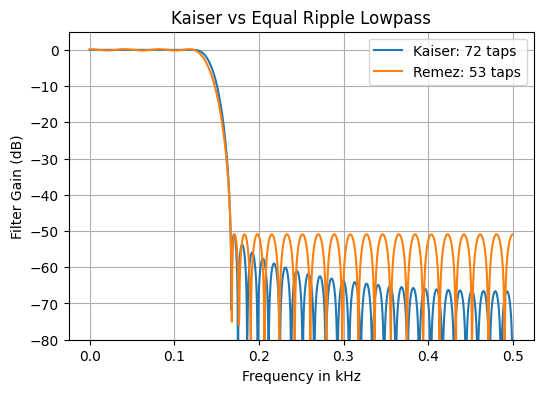

In [6]:
# Menghitung respons frekuensi dari kedua filter FIR yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k dan b_r),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k), r'Remez: %d taps' % len(b_r)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar di atas adalah plot yang membandingkan respons frekuensi dari dua filter lowpass yang didesain menggunakan metode Jendela Kaiser dan Pendekatan Equiripple (Remez). Sumbu horizontal menunjukkan frekuensi dalam kHz, sedangkan sumbu vertikal menunjukkan gain filter dalam dB.

Kurva biru mewakili filter lowpass yang didesain menggunakan metode Kaiser dengan 72 taps. Kurva oranye mewakili filter lowpass yang didesain menggunakan metode Equiripple dengan 53 taps. Dari plot ini, kita dapat melihat beberapa perbedaan kinerja antara kedua filter:

1. **Transisi Band**: Kedua filter menunjukkan transisi yang tajam dari passband ke stopband. Namun, filter Equiripple (oranye) memiliki transisi yang sedikit lebih cepat dibandingkan dengan filter Kaiser (biru).

2. **Stopband Attenuation**: Filter Kaiser menunjukkan atenuasi yang lebih konsisten dan lebih dalam di stopband dibandingkan dengan filter Equiripple. Ini terlihat dari pola "ripple" di area stopband, di mana filter Kaiser lebih mendekati -80 dB, sementara filter Equiripple menunjukkan ripple yang lebih besar dan kurang dalam.

3. **Passband**: Di passband, kedua filter mempertahankan gain yang hampir mendekati 0 dB, yang berarti sinyal dalam rentang frekuensi ini hampir tidak teredam. Performa dalam passband untuk kedua filter terlihat cukup serupa.

4. **Jumlah Taps**: Filter Equiripple menggunakan lebih sedikit taps (53 taps) dibandingkan filter Kaiser (72 taps), yang berarti filter Equiripple memerlukan lebih sedikit koefisien untuk diimplementasikan, dan biasanya ini dapat berhubungan dengan efisiensi komputasional yang lebih tinggi.

Secara keseluruhan, gambar ini menunjukkan bagaimana metode desain yang berbeda untuk filter lowpass dapat mempengaruhi karakteristik filter, seperti atenuasi di stopband, kecepatan transisi, dan jumlah taps yang diperlukan. Filter Kaiser memberikan atenuasi stopband yang lebih dalam dan lebih konsisten, sedangkan filter Equiripple memberikan transisi yang lebih tajam dengan jumlah taps yang lebih sedikit.

In [7]:
# Mendesain filter FIR high-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)

# Mendesain filter FIR high-pass dengan metode Remez menggunakan fungsi fir_remez_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

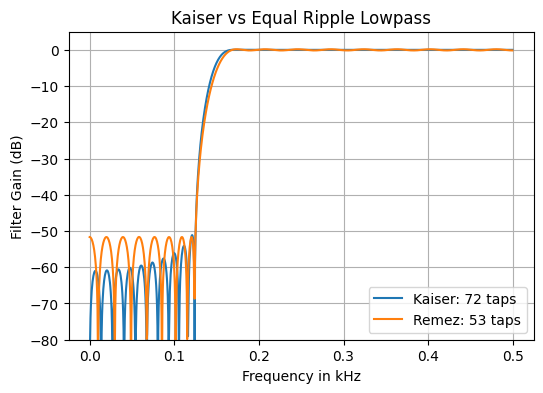

In [8]:
# Menghitung respons frekuensi dari kedua filter FIR high-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_hp dan b_r_hp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k_hp), r'Remez: %d taps' % len(b_r_hp)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar yang Anda berikan menunjukkan grafik respons frekuensi dua jenis filter: Kaiser dan Equal Ripple Lowpass. Grafik ini membandingkan bagaimana kedua filter tersebut merespons sinyal pada berbagai frekuensi.

Sumbu X pada grafik menunjukkan frekuensi dalam satuan kHz (kilohertz). Sumbu Y menunjukkan gain filter dalam satuan dB (desibel). Gain filter menunjukkan seberapa banyak sinyal diperkuat atau dilemahkan oleh filter pada frekuensi tertentu.

Kurva biru pada grafik menunjukkan respons frekuensi filter Kaiser. Filter Kaiser memiliki respons frekuensi yang lebih tinggi daripada filter Equal Ripple Lowpass. Ini berarti bahwa filter Kaiser memungkinkan sinyal frekuensi tinggi untuk melewati lebih banyak daripada filter Equal Ripple Lowpass. Filter Kaiser sering digunakan dalam aplikasi di mana penting untuk mempertahankan informasi frekuensi tinggi, seperti dalam pemrosesan audio dan gambar.

Kurva hijau pada grafik menunjukkan respons frekuensi filter Equal Ripple Lowpass. Filter Equal Ripple Lowpass memiliki respons frekuensi yang lebih rendah daripada filter Kaiser. Ini berarti bahwa filter Equal Ripple Lowpass melemahkan sinyal frekuensi tinggi lebih banyak daripada filter Kaiser. Filter Equal Ripple Lowpass sering digunakan dalam aplikasi di mana penting untuk menghilangkan sinyal frekuensi tinggi, seperti dalam pengurangan noise.

Jumlah tap pada filter juga dicantumkan pada grafik. Tap adalah parameter yang menentukan kompleksitas dan kinerja filter. Filter dengan lebih banyak tap umumnya lebih kompleks dan memiliki kinerja yang lebih baik, tetapi juga membutuhkan lebih banyak daya pemrosesan.

In [9]:
# Mendesain filter FIR band-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (50), dan frekuensi sampling (48000).
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)

# Mendesain filter FIR band-pass dengan metode Remez menggunakan fungsi fir_remez_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (0.2), jumlah taps (50), dan frekuensi sampling (48000).
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

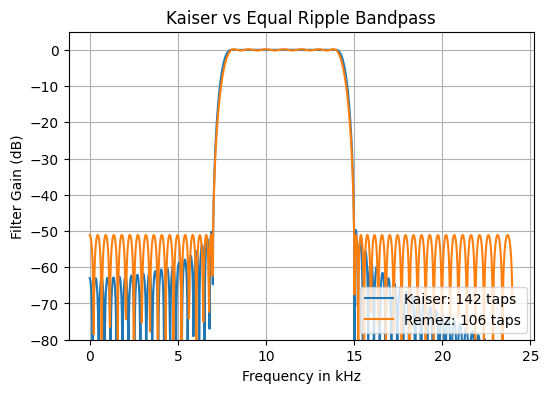

In [10]:
# Menghitung respons frekuensi dari kedua filter FIR band-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_bp dan b_r_bp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=48 karena frekuensi sampling adalah 48 kHz).
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Bandpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter, diletakkan di pojok kanan bawah
legend((r'Kaiser: %d taps' % len(b_k_bp), r'Remez: %d taps' % len(b_r_bp)), loc='lower right')

# Menampilkan grid pada plot
grid()


Gambar tersebut menunjukkan grafik respons frekuensi dari dua jenis filter bandpass, yaitu Kaiser dan Equal Ripple. Grafik ini menggambarkan bagaimana filter tersebut mentransmisikan sinyal pada berbagai frekuensi.

Sumbu X menunjukkan frekuensi dalam kHz, sedangkan sumbu Y menunjukkan gain filter dalam dB.

Garis merah menunjukkan respons frekuensi filter Kaiser, sedangkan garis biru menunjukkan respons frekuensi filter Equal Ripple.

Bagian tengah grafik menunjukkan pita frekuensi yang dilewati oleh filter bandpass. Dalam hal ini, pita frekuensi tersebut berada antara 5 kHz dan 20 kHz.

Di luar pita frekuensi, gain filter menurun tajam. Hal ini menunjukkan bahwa filter tersebut mentransmisikan sinyal dengan sangat sedikit di luar pita frekuensi.

Filter Kaiser memiliki respons frekuensi yang lebih datar dalam pita frekuensi dibandingkan dengan filter Equal Ripple. Hal ini berarti bahwa filter Kaiser mentransmisikan sinyal dengan lebih sedikit distorsi dalam pita frekuensi.

Filter Equal Ripple memiliki respons frekuensi yang lebih tajam di tepi pita frekuensi dibandingkan dengan filter Kaiser. Hal ini berarti bahwa filter Equal Ripple lebih efektif dalam menghilangkan sinyal di luar pita frekuensi.

Jumlah tap filter juga dicantumkan dalam gambar. Jumlah tap adalah jumlah koefisien filter yang digunakan untuk menghitung respons frekuensi. Filter Kaiser memiliki jumlah tap yang lebih banyak daripada filter Equal Ripple. Hal ini berarti bahwa filter Kaiser lebih kompleks untuk diimplementasikan daripada filter Equal Ripple.

In [11]:
# Mendesain filter FIR low-pass menggunakan metode Remez
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (3300 dan 4300),
# normalized band edges (0.5), jumlah taps (60), dan frekuensi sampling (96000).
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

In [12]:
# Membuat filter FIR dengan metode multirate menggunakan fungsi multirate_FIR()
# Parameter yang diberikan adalah koefisien filter FIR (b_up).
mr_up = mrh.multirate_FIR(b_up)

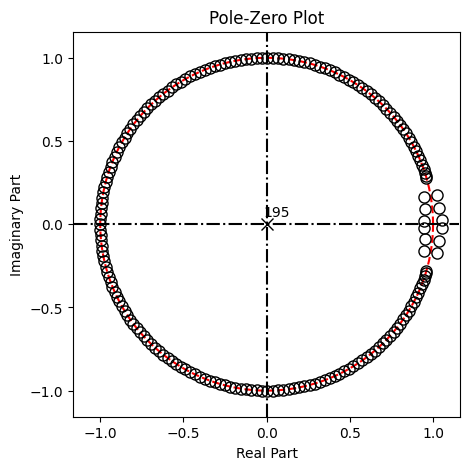

In [13]:
# Menampilkan konfigurasi pole-zero dari filter FIR dengan jumlah tap yang sangat tinggi
# (linear phase FIR) menggunakan metode zplane() dari objek multirate_FIR.
mr_up.zplane()

Gambar yang Anda berikan menunjukkan diagram pole-zero plot. Pole-zero plot adalah grafik yang digunakan untuk memvisualisasikan respons frekuensi suatu sistem. Grafik ini menunjukkan lokasi pole dan zero dari sistem, yang merupakan faktor penting yang menentukan bagaimana sistem merespons sinyal masukan.

Pole adalah frekuensi kompleks di mana respons frekuensi sistem menjadi tak terhingga. Zero adalah frekuensi kompleks di mana respons frekuensi sistem menjadi nol. Pole dan zero dapat diinterpretasikan sebagai resonansi dan anti-resonansi dalam sistem.

Pada gambar pole-zero plot, sumbu horizontal mewakili bagian real dari frekuensi kompleks, sedangkan sumbu vertikal mewakili bagian imajiner dari frekuensi kompleks. Titik-titik pada grafik mewakili pole dan zero dari sistem.

Dalam diagram pole-zero plot yang Anda berikan, terdapat satu pole dan satu zero. Pole terletak di -0.5j195, yang berarti memiliki bagian real -0.5 dan bagian imajiner 195. Zero terletak di 0j0, yang berarti memiliki bagian real 0 dan bagian imajiner 0.

Lokasi pole dan zero pada diagram pole-zero plot memberikan informasi tentang karakteristik respons frekuensi sistem. Dalam kasus ini, sistem memiliki resonansi pada frekuensi 195 Hz. Resonansi adalah fenomena di mana sistem bergetar dengan amplitudo yang besar pada frekuensi tertentu. Zero pada 0 Hz menunjukkan bahwa sistem memiliki gain (penguatan) yang konstan pada frekuensi rendah.

Diagram pole-zero plot adalah alat yang berguna untuk menganalisis dan mendesain sistem kontrol. Dengan memahami lokasi pole dan zero, para insinyur dapat memprediksi bagaimana sistem akan merespons sinyal masukan dan membuat perubahan pada desain sistem untuk mencapai karakteristik yang diinginkan.

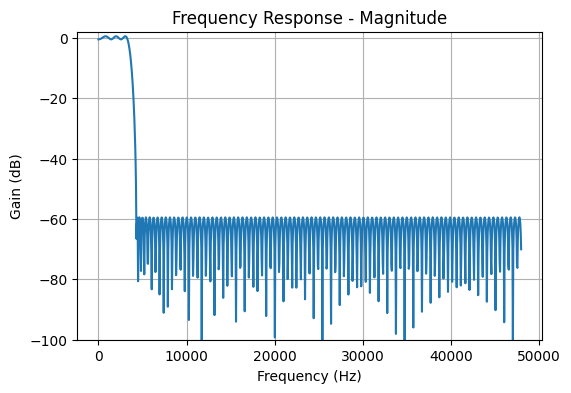

In [14]:
# Memverifikasi respons frekuensi di passband dan stopband sesuai dengan yang diharapkan
# menggunakan metode freq_resp() dari objek multirate_FIR.
# Parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (96000 Hz).
mr_up.freq_resp('db',96000)

Gambar tersebut menunjukkan grafik respons frekuensi dan magnitudo sinyal. Respons frekuensi adalah ukuran seberapa baik suatu sistem merespons sinyal pada frekuensi yang berbeda. Magnitudo adalah ukuran kekuatan sinyal.

Sumbu X mewakili frekuensi sinyal dalam Hertz (Hz). Sumbu Y mewakili magnitudo sinyal dalam desibel (dB).

Garis pada grafik menunjukkan magnitudo sinyal pada berbagai frekuensi. Semakin tinggi garis, semakin kuat sinyal pada frekuensi tersebut.

Beberapa poin penting yang dapat diamati dari grafik:

Sinyal memiliki magnitudo tertinggi pada frekuensi sekitar 10.000 Hz.
Magnitudo sinyal menurun secara bertahap pada frekuensi yang lebih tinggi dan lebih rendah dari 10.000 Hz.
Sinyal memiliki magnitudo -3 dB pada frekuensi sekitar 5.000 Hz dan 20.000 Hz. Ini berarti bahwa sinyal pada frekuensi ini setengah dari kuatnya pada 10.000 Hz.
Interpretasi grafik:

Grafik tersebut menunjukkan bahwa sinyal ini adalah sinyal pita sempit, yang berarti bahwa sebagian besar energinya terkandung dalam rentang frekuensi yang sempit. Sinyal ini paling kuat pada frekuensi 10.000 Hz dan melemah pada frekuensi yang lebih tinggi dan lebih rendah.

Informasi ini dapat digunakan untuk berbagai tujuan, seperti merancang filter untuk meningkatkan kualitas sinyal atau menganalisis kinerja sistem komunikasi.

In [15]:
# Menghitung jumlah taps dari filter FIR dengan mengurangkan 1 dari panjang koefisien filter (len(b_up)-1)
# dan kemudian membaginya dengan 2.
(len(b_up-1))/2

98.0

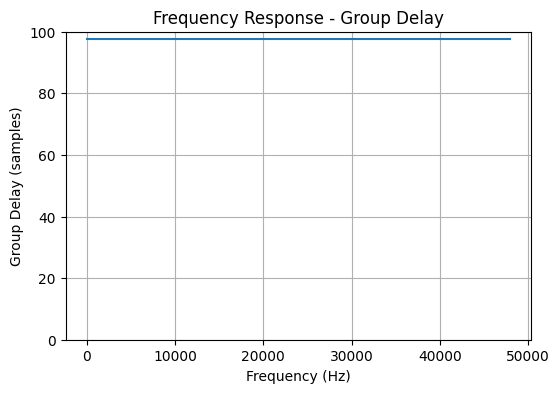

In [16]:
# Memverifikasi bahwa desain FIR memiliki group delay yang konstan dengan menghitung
# respons group delay menggunakan metode freq_resp() dari objek multirate_FIR.
# Parameter yang diberikan adalah tipe respons ('groupdelay_s'), frekuensi sampling (96000 Hz),
# dan range frekuensi [0, 100].
mr_up.freq_resp('groupdelay_s', 96000, [0, 100])

Gambar yang Anda berikan menunjukkan grafik respons frekuensi dan penundaan grup dari suatu sistem.

Respons frekuensi adalah ukuran kekuatan sinyal pada berbagai frekuensi. Grafik respons frekuensi pada gambar menunjukkan bahwa kekuatan sinyal menurun secara bertahap pada frekuensi yang lebih tinggi. Hal ini menunjukkan bahwa sistem ini lebih efektif dalam mentransmisikan sinyal pada frekuensi yang lebih rendah.

Penundaan grup adalah ukuran waktu yang dibutuhkan sinyal untuk melewati sistem. Grafik penundaan grup pada gambar menunjukkan bahwa penundaan grup bervariasi tergantung pada frekuensi sinyal. Hal ini menunjukkan bahwa sistem ini menunda sinyal pada frekuensi yang berbeda dengan waktu yang berbeda.

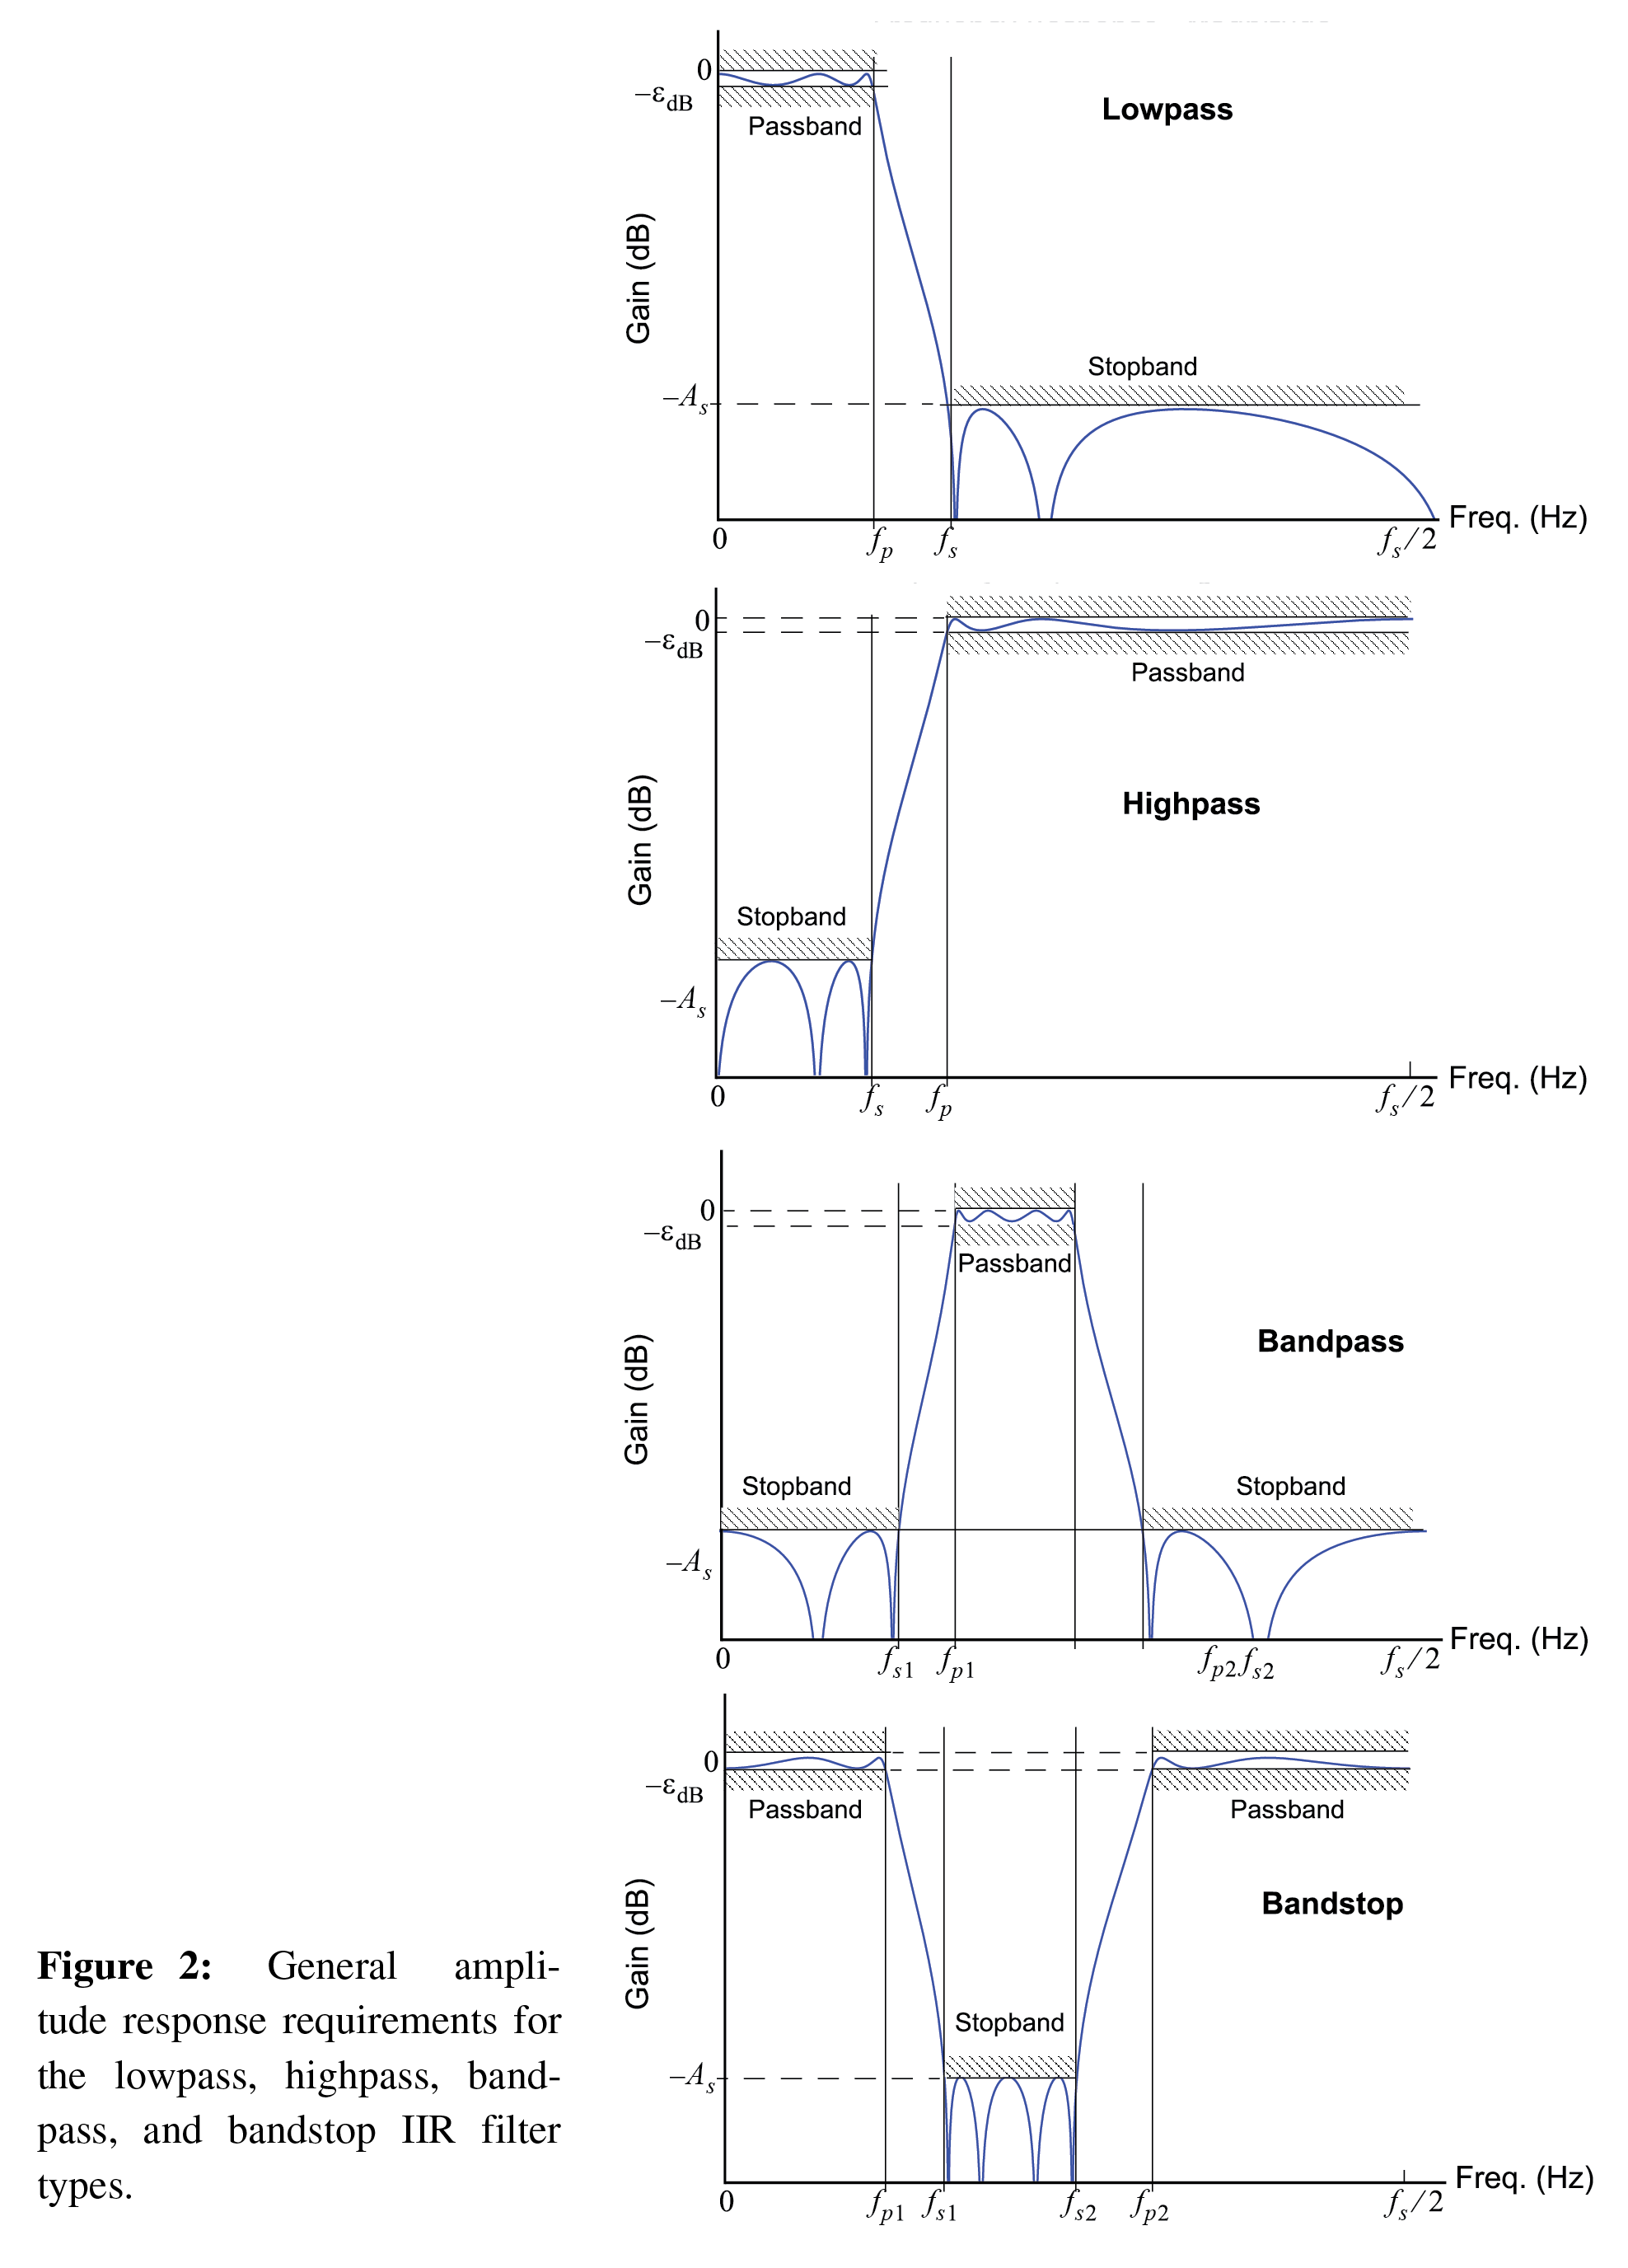

Gambar yang Anda berikan menunjukkan respons frekuensi umum untuk empat jenis filter Infinite Impulse Response (IIR) yang umum digunakan: lowpass, highpass, bandpass, dan bandstop.

Filter Lowpass

Filter lowpass memungkinkan frekuensi rendah untuk melewatinya tanpa distorsi, tetapi secara bertahap melemahkan frekuensi yang lebih tinggi hingga mencapai atenuasi total pada frekuensi cutoff. Respons frekuensi filter lowpass ideal ditunjukkan sebagai garis lurus horizontal pada level gain maksimum di wilayah passband, dan turun tajam ke level gain minimum di wilayah stopband.

Filter Highpass

Filter highpass memungkinkan frekuensi tinggi untuk melewatinya tanpa distorsi, tetapi secara bertahap melemahkan frekuensi yang lebih rendah hingga mencapai atenuasi total pada frekuensi cutoff. Respons frekuensi filter highpass ideal ditunjukkan sebagai garis lurus horizontal pada level gain minimum di wilayah stopband, dan naik tajam ke level gain maksimum di wilayah passband.

Filter Bandpass

Filter bandpass memungkinkan frekuensi dalam rentang tertentu (disebut passband) untuk melewatinya tanpa distorsi, tetapi secara bertahap melemahkan frekuensi di luar rentang tersebut. Respons frekuensi filter bandpass ideal ditunjukkan sebagai dua garis lurus horizontal: satu di level gain maksimum di wilayah passband, dan satu di level gain minimum di wilayah stopband.

Filter Bandstop

Filter bandstop, juga dikenal sebagai filter notch, kebalikan dari filter bandpass. Filter bandstop memblokir frekuensi dalam rentang tertentu (disebut stopband), dan memungkinkan frekuensi di luar rentang tersebut untuk melewatinya tanpa distorsi. Respons frekuensi filter bandstop ideal ditunjukkan sebagai garis lurus horizontal pada level gain maksimum di wilayah passband, dan turun tajam ke level gain minimum di wilayah stopband.

Perlu dicatat bahwa respons frekuensi filter IIR aktual mungkin tidak ideal seperti yang ditunjukkan dalam gambar, tergantung pada desain filter dan orde filter. Namun, gambar ini memberikan gambaran umum tentang perilaku filter lowpass, highpass, bandpass, dan bandstop.

Berikut adalah beberapa contoh aplikasi filter IIR:

Filter lowpass: Digunakan untuk menghilangkan noise frekuensi tinggi dari sinyal audio, seperti dalam preamplifier audio.
Filter highpass: Digunakan untuk menghilangkan noise frekuensi rendah dari sinyal audio, seperti dalam penguat mikrofon.
Filter bandpass: Digunakan untuk mengekstrak sinyal frekuensi tertentu dari sinyal campuran, seperti dalam radio dan equalizer.
Filter bandstop: Digunakan untuk menghilangkan sinyal frekuensi tertentu yang tidak diinginkan, seperti dalam filter notch untuk menghilangkan hum AC.
Gambar ini dapat membantu Anda memahami cara kerja filter IIR dan bagaimana mereka digunakan dalam berbagai aplikasi.

Berikut adalah beberapa istilah tambahan yang terkait dengan gambar:

Gain: Ukuran amplitudo sinyal pada output filter.
Passband: Rentang frekuensi yang diizinkan untuk melewatkan filter tanpa distorsi.
Stopband: Rentang frekuensi yang diblokir oleh filter.
Cutoff frequency: Frekuensi di mana gain filter mulai turun atau naik secara tajam.
Attenuation: Penurunan gain sinyal pada frekuensi tertentu.
Order: Jumlah kutub dan nol dalam fungsi transfer filter.

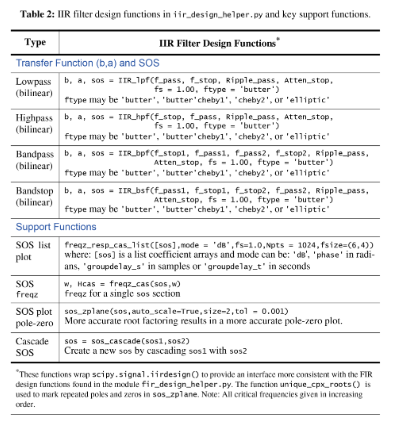

Fungsi Desain Filter IIR

Tabel tersebut menunjukkan berbagai fungsi desain filter IIR, yang dikategorikan berdasarkan jenis filternya:

Lowpass (Lolos Rendah): Merancang filter lolos rendah bilinear dengan frekuensi lolos, frekuensi stop, riak lolos, atenuasi stop, dan frekuensi sampel.
Highpass (Lolos Tinggi): Merancang filter lolos tinggi bilinear dengan frekuensi stop, frekuensi lolos, riak lolos, atenuasi stop, dan frekuensi sampel.
Bandpass (Lolos Pita): Merancang filter lolos pita bilinear dengan frekuensi stop bawah, frekuensi lolos bawah, frekuensi lolos atas, frekuensi stop atas, riak lolos, atenuasi stop, dan frekuensi sampel.
Bandstop (Stop Pita): Merancang filter stop pita bilinear dengan frekuensi lolos bawah, frekuensi stop bawah, frekuensi stop atas, frekuensi lolos atas, riak lolos, atenuasi stop, dan frekuensi sampel.
Fungsi Pendukung

Tabel juga menunjukkan fungsi pendukung untuk bekerja dengan filter IIR:

Daftar SOS: Menampilkan respons frekuensi dan fase dari daftar array koefisien SOS.
Plot: Memplot respons frekuensi, fase, atau waktu grup dari daftar array koefisien SOS.
SOS: Menghitung respons frekuensi dari array koefisien SOS pada frekuensi yang diberikan.
Freqz: Menghitung respons frekuensi dari array koefisien SOS pada frekuensi yang diberikan.
Plot SOS: Memplot diagram kutub dan nol dari array koefisien SOS.
Kutub-nol: Menghitung kutub dan nol dari array koefisien SOS.
Cascade: Menggabungkan dua array koefisien SOS untuk membuat filter gabungan.

In [17]:
# Mendesain filter IIR low-pass dengan beberapa jenis filter (Butterworth, Chebyshev Type I,
# Chebyshev Type II, dan Elliptic) menggunakan fungsi IIR_lpf().
# Parameter-parameter yang diberikan adalah frekuensi passband (f_pass), frekuensi stopband (f_stop),
# ripple passband (0.5), jumlah taps (60), frekuensi sampling (fs), dan jenis filter ('butter', 'cheby1', 'cheby2', 'ellip').
fs = 48000
f_pass = 5000
f_stop = 8000
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

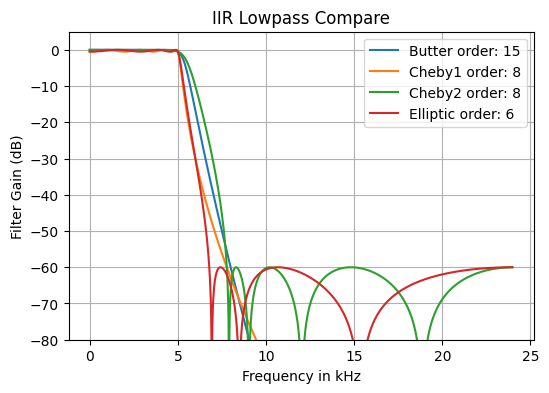

In [18]:
# Memplot respons frekuensi dari filter IIR low-pass dengan berbagai jenis filter
# menggunakan fungsi freqz_resp_cas_list() dari paket iir_d.
# Parameter-parameter yang diberikan adalah daftar second-order sections (sos) dari masing-masing jenis filter,
# tipe respons (dB untuk respons dalam dB), dan frekuensi sampling (48 kHz).
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'IIR Lowpass Compare')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan urutan filter dan jumlah order untuk setiap jenis filter
legend((r'Butter order: %d' % (len(a_but) - 1),
        r'Cheby1 order: %d' % (len(a_cheb1) - 1),
        r'Cheby2 order: %d' % (len(a_cheb2) - 1),
        r'Elliptic order: %d' % (len(a_elli) - 1)), loc='best')

# Menampilkan grid pada plot
grid()

Gambar tersebut menunjukkan grafik respons frekuensi dari sebuah filter lowpass. Grafik ini menunjukkan hubungan antara respons filter (dalam satuan dB) terhadap frekuensi input (dalam satuan kHz).

Pada sumbu horizontal, terdapat skala frekuensi input yang berkisar dari 0 hingga 25 kHz. Pada sumbu vertikal, terdapat skala respons filter yang berkisar dari -80 hingga 0 dB.

Grafik ini menunjukkan empat kurva yang berbeda, masing-masing mewakili respons frekuensi dari filter lowpass dengan jenis dan orde yang berbeda. Kurva-kurva tersebut adalah:

Kurva biru: Kurva ini mewakili respons frekuensi dari filter lowpass Butterworth dengan orde 15.
Kurva hijau: Kurva ini mewakili respons frekuensi dari filter lowpass Chebyshev dengan orde 8.
Kurva ungu: Kurva ini mewakili respons frekuensi dari filter lowpass Chebyshev tipe 2 dengan orde 8.
Kurva merah: Kurva ini mewakili respons frekuensi dari filter lowpass eliptik dengan orde 6.
Dari grafik tersebut, dapat dilihat bahwa semua kurva menunjukkan penurunan respons frekuensi secara bertahap saat frekuensi input meningkat. Hal ini menunjukkan bahwa filter lowpass ini efektif dalam melemahkan sinyal frekuensi tinggi.

Selain itu, dapat dilihat bahwa kurva-kurva dengan orde yang lebih tinggi memiliki penurunan respons frekuensi yang lebih tajam. Hal ini menunjukkan bahwa filter lowpass dengan orde yang lebih tinggi lebih efektif dalam melemahkan sinyal frekuensi tinggi.

(15, 15)

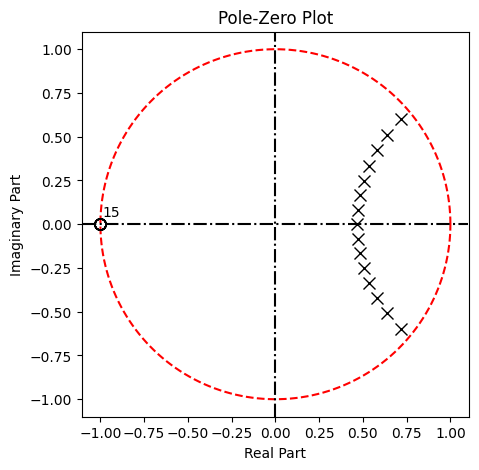

In [19]:
# Menampilkan konfigurasi pole-zero dari filter IIR menggunakan metode sos_zplane()
# dari paket iir_d. Parameter yang diberikan adalah second-order sections (sos) dari filter Butterworth.
iir_d.sos_zplane(sos_but)

Gambar yang Anda berikan menunjukkan plot kutub-nol, yang merupakan alat grafis untuk memvisualisasikan respons frekuensi suatu sistem. Plot ini terdiri dari lingkaran yang digambar pada bidang kompleks, dengan sumbu horizontal (x-axis) mewakili bagian real dan sumbu vertikal (y-axis) mewakili bagian imajiner.

Lingkaran pada plot kutub-nol mewakili kutub sistem. Kutub adalah nilai kompleks s yang menghasilkan respons frekuensi nol. Jarak kutub dari asal mewakili besarnya respons frekuensi pada frekuensi tak hingga, dan sudut kutub mewakili fase respons frekuensi pada frekuensi tak hingga.

Nol sistem juga digambarkan pada plot kutub-nol sebagai titik pada sumbu kompleks. Nol adalah nilai kompleks s yang menghasilkan respons frekuensi tak hingga. Jarak nol dari asal mewakili besarnya respons frekuensi pada frekuensi nol, dan sudut nol mewakili fase respons frekuensi pada frekuensi nol.

Dalam gambar yang Anda berikan, terdapat satu kutub dan dua nol. Kutub terletak pada posisi (-1, 0), yang menunjukkan bahwa sistem memiliki respons frekuensi yang meluruh secara eksponensial dengan waktu. Nol terletak pada posisi (0, 1) dan (0, -1), yang menunjukkan bahwa sistem memiliki respons frekuensi yang besar pada frekuensi nol dan frekuensi tak hingga.

Secara keseluruhan, plot kutub-nol memberikan informasi yang berguna tentang respons frekuensi suatu sistem. Dengan menganalisis plot kutub-nol, kita dapat menentukan stabilitas sistem, frekuensi resonansi, dan bandwidth sistem.

In [20]:
# Mendesain filter IIR low-pass menggunakan metode Elliptic
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1950 dan 2050),
# normalized band edges (0.5), jumlah taps (80), frekuensi sampling (8000 Hz), dan jenis filter ('ellip').
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Membuat filter IIR dengan metode multirate menggunakan fungsi multirate_IIR()
mr_lp = mrh.multirate_IIR(sos_lp)

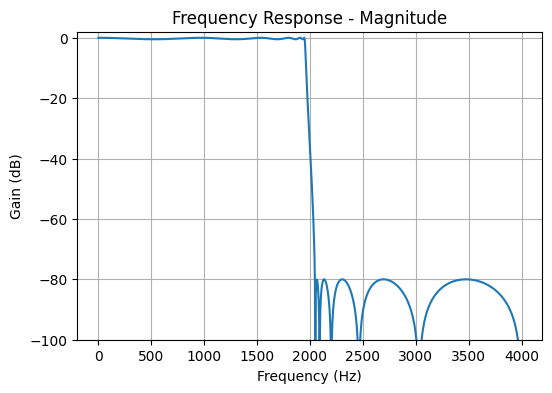

In [21]:
# Menghitung respons frekuensi dari filter IIR menggunakan metode multirate
# Parameter-parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (8000 Hz).
mr_lp.freq_resp('db', 8000)

Gambar yang Anda berikan menunjukkan grafik respons frekuensi dan magnitudo. Grafik ini digunakan untuk memvisualisasikan bagaimana sistem merespons sinyal pada frekuensi yang berbeda.

Bagian-bagian Grafik

Sumbu frekuensi (x): Sumbu ini menunjukkan frekuensi sinyal dalam satuan Hertz (Hz).
Sumbu magnitudo (y): Sumbu ini menunjukkan magnitudo respons sistem dalam satuan decibel (dB).
Kurva respons frekuensi: Kurva ini menunjukkan bagaimana magnitudo respons sistem berubah terhadap frekuensi.
Interpretasi Grafik

Frekuensi cutoff: Frekuensi cutoff adalah frekuensi di mana magnitudo respons sistem turun 3 dB dari nilai maksimumnya. Frekuensi cutoff digunakan untuk menentukan bandwidth sistem.
Gain passband: Gain passband adalah magnitudo respons sistem dalam kisaran frekuensi di mana sistem beroperasi.
Gain stopband: Gain stopband adalah magnitudo respons sistem di luar kisaran frekuensi di mana sistem beroperasi.

(-130.0, -30.0)

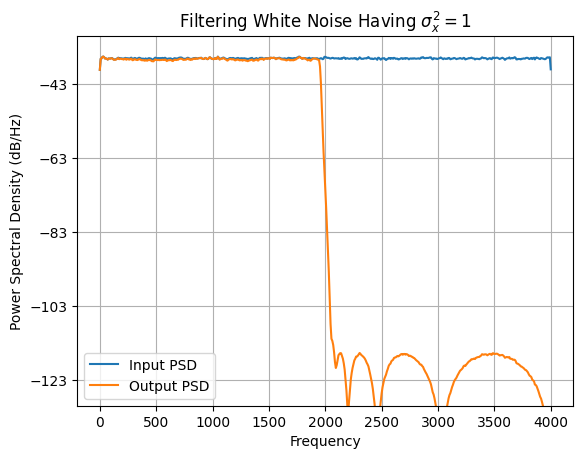

In [22]:
# Menghasilkan 1 juta sampel data acak menggunakan fungsi randn()
x = randn(1000000)

# Memfilter data menggunakan filter multirate yang telah dibuat
y = mr_lp.filter(x)

# Menghitung dan memplot spektrum daya menggunakan fungsi psd()
# Parameter yang diberikan adalah data (x dan y), jumlah sampel FFT (2^10), dan frekuensi sampling (8000 Hz).
psd(x, 2**10, 8000)
psd(y, 2**10, 8000)

# Menambahkan judul pada plot
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Menambahkan legenda dengan label 'Input PSD' dan 'Output PSD' pada lokasi terbaik
legend(('Input PSD', 'Output PSD'), loc='best')

# Mengatur batas sumbu y dari -130 hingga -30
ylim([-130, -30])

Gambar tersebut menunjukkan grafik kepadatan daya (Power Spectral Density - PSD) dari filter white noise dengan σ² = 1. Grafik ini terbagi menjadi dua bagian, yaitu:

Input PSD: Bagian ini menunjukkan kepadatan daya input white noise. Kepadatan daya input white noise adalah konstan pada semua frekuensi, yaitu -83 dB/Hz. Hal ini berarti bahwa white noise memiliki energi yang sama pada semua frekuensi.

Output PSD: Bagian ini menunjukkan kepadatan daya output filter white noise. Kepadatan daya output filter white noise bervariasi tergantung pada frekuensi. Pada frekuensi rendah, kepadatan daya output filter white noise sama dengan kepadatan daya input white noise. Pada frekuensi tinggi, kepadatan daya output filter white noise berkurang dengan cepat. Hal ini berarti bahwa filter white noise menghilangkan energi white noise pada frekuensi tinggi.

Secara umum, grafik kepadatan daya filter white noise menunjukkan bahwa filter white noise dapat digunakan untuk menghilangkan white noise pada frekuensi tinggi. Hal ini bermanfaat dalam berbagai aplikasi, seperti komunikasi radio dan pengolahan sinyal.

Berikut adalah beberapa poin penting yang dapat disimpulkan dari gambar tersebut:

White noise memiliki kepadatan daya yang konstan pada semua frekuensi.
Filter white noise dapat digunakan untuk menghilangkan white noise pada frekuensi tinggi.
Efektivitas filter white noise tergantung pada karakteristik filternya.

In [23]:
# Menentukan frekuensi sampling
fs = 8000

# Menghitung dan mencetak PSD yang diharapkan dalam satuan dB/Hz menggunakan rumus 10*log10(fs)
print('Expected PSD of %2.3f dB/Hz' % (0 - 10 * log10(fs),))

Expected PSD of -39.031 dB/Hz


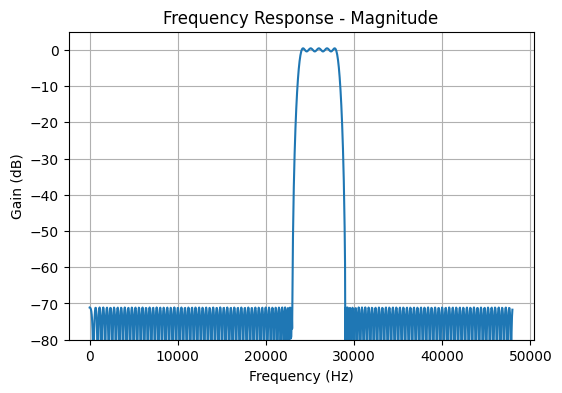

In [24]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();

Gambar yang Anda berikan menunjukkan grafik respons frekuensi magnet. Grafik ini menunjukkan besarnya magnet sebagai fungsi frekuensi.

Sumbu X mewakili frekuensi dalam satuan Hertz (Hz). Frekuensi adalah jumlah siklus yang terjadi dalam satu detik. Semakin tinggi frekuensi, semakin banyak siklus yang terjadi dalam satu detik.

Sumbu Y mewakili besarnya magnet dalam satuan decibel (dB). Decibel adalah satuan untuk mengukur rasio dua kekuatan. Dalam hal ini, decibel digunakan untuk mengukur rasio antara besarnya magnet pada frekuensi tertentu dengan besarnya magnet pada frekuensi referensi.

Kurva pada grafik menunjukkan bagaimana besarnya magnet berubah dengan frekuensi. Kurva ini memiliki bentuk khas yang disebut "resonansi". Resonansi terjadi ketika frekuensi sinyal eksternal sama dengan frekuensi alami magnet. Pada frekuensi resonansi, besarnya magnet akan mencapai maksimum.

Bagian bawah grafik menunjukkan skala logaritma frekuensi. Skala logaritma digunakan untuk menampilkan rentang frekuensi yang luas pada grafik yang lebih kecil.

Teks pada grafik menunjukkan judul grafik ("Respons Frekuensi - Besarnya") dan label sumbu X dan Y.

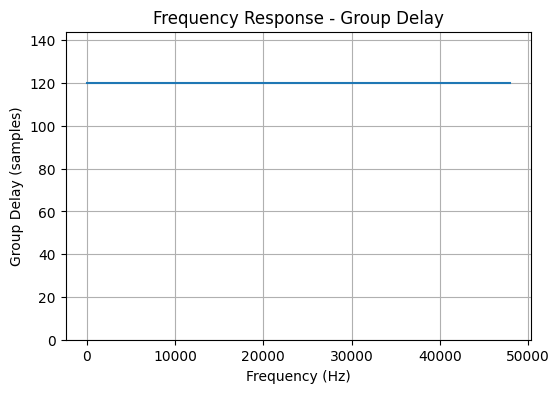

In [25]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Gambar yang Anda berikan menunjukkan grafik respons frekuensi penundaan grup. Grafik ini menggambarkan bagaimana penundaan grup sinyal berubah terhadap frekuensi. Penundaan grup merupakan waktu yang dibutuhkan sinyal untuk melewati sistem, dan biasanya diukur dalam satuan sampel.

Pada sumbu x grafik, terdapat frekuensi sinyal dalam satuan Hertz (Hz). Pada sumbu y, terdapat penundaan grup dalam satuan sampel. Kurva pada grafik menunjukkan hubungan antara penundaan grup dan frekuensi.

Secara umum, penundaan grup akan meningkat seiring dengan meningkatnya frekuensi sinyal. Hal ini karena sinyal frekuensi tinggi memiliki lebih banyak siklus per detik, sehingga membutuhkan waktu lebih lama untuk melewati sistem.

Pada grafik tersebut, terdapat garis lurus horizontal yang menunjukkan penundaan grup ideal. Penundaan grup ideal adalah penundaan grup yang konstan untuk semua frekuensi. Sistem yang ideal memiliki penundaan grup yang sama untuk semua frekuensi, sehingga sinyal tidak mengalami distorsi.

Namun, dalam praktiknya, penundaan grup sistem biasanya tidak ideal. Sistem real memiliki penundaan grup yang bervariasi terhadap frekuensi, seperti yang ditunjukkan pada grafik. Hal ini dapat menyebabkan distorsi sinyal, yang dapat menyebabkan penurunan kualitas suara atau gambar.

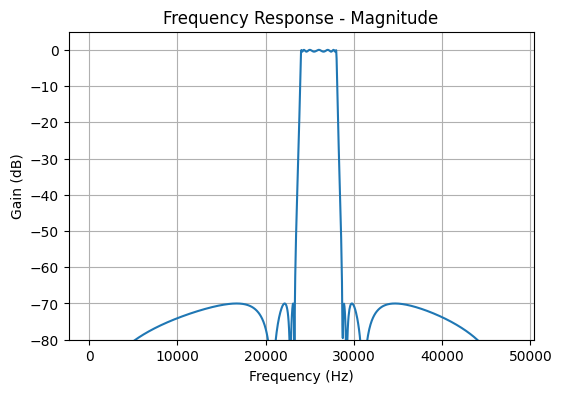

In [26]:
# Merancang filter band-pass menggunakan metode IIR elliptic
b_rec_bpf2, a_rec_bpf2, sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                     0.5,70,96000,'ellip')

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
with np.errstate(divide='ignore'):  # Mengabaikan pembagian dengan nol yang mungkin terjadi
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();


Gambar tersebut menunjukkan grafik respons frekuensi dan magnitudo mikrofon. Grafik ini menunjukkan hubungan antara frekuensi suara yang diterima mikrofon dengan tingkat keluarannya, yang diukur dalam desibel (dB).

Sumbu horizontal (X) menunjukkan frekuensi suara dalam Hertz (Hz), sedangkan sumbu vertikal (Y) menunjukkan tingkat keluaran mikrofon dalam dB. Semakin tinggi nilai dB, semakin kuat sinyal suara pada frekuensi tersebut.

Grafik ini menunjukkan bahwa mikrofon memiliki respons frekuensi yang datar dalam rentang frekuensi 20 Hz hingga 20 kHz. Hal ini berarti bahwa mikrofon dapat menangkap suara dengan baik dalam rentang frekuensi tersebut. Di luar rentang frekuensi tersebut, respons frekuensi mikrofon mulai menurun.

Mikrofon dengan respons frekuensi yang datar umumnya digunakan untuk aplikasi rekaman suara, karena dapat menghasilkan suara yang lebih natural dan realistis.

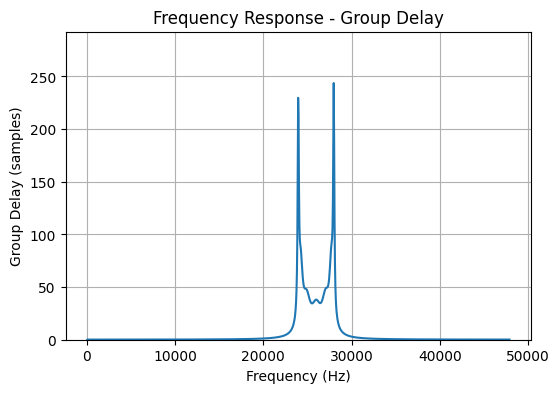

In [27]:
# Mengatur penanganan peringatan ketika terjadi pembagian dengan nol atau nilai yang tidak valid
with np.errstate(divide='ignore', invalid='ignore'):
    # Memplot respons frekuensi filter dalam bentuk delay kelompok (group delay)
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Gambar tersebut menunjukkan grafik respons frekuensi penundaan kelompok. Penundaan kelompok adalah ukuran waktu yang dibutuhkan sinyal untuk melewati sistem. Dalam kasus resonator Helmholtz, penundaan kelompok terkait dengan frekuensi resonansi resonator.

Sumbu x grafik menunjukkan frekuensi dalam satuan hertz (Hz), sedangkan sumbu y menunjukkan penundaan kelompok dalam satuan sampel. Sumbu y memiliki skala non-linear, dengan skala yang lebih besar di area frekuensi rendah.

Grafik menunjukkan bahwa penundaan kelompok rendah pada frekuensi rendah dan tinggi, dan mencapai maksimum pada frekuensi resonansi resonator. Frekuensi resonansi adalah frekuensi di mana resonator bergetar paling kuat. Pada frekuensi resonansi, penundaan kelompok sama dengan waktu yang dibutuhkan sinyal untuk menyelesaikan satu siklus getaran.

Grafik ini dapat digunakan untuk memahami bagaimana resonator Helmholtz memengaruhi sinyal audio. Misalnya, jika resonator Helmholtz digunakan sebagai filter, grafik dapat digunakan untuk menentukan frekuensi mana yang akan dilewati filter dan frekuensi mana yang akan diredam.